In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import os
import rootpath
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def get_cpd_df(file, aspect):
    """
    Get the dataframe for change point detection algorithm.
    :param file: file from "cpd_aspects"
    :param aspect: aspect from topics.
    :return: dataframe.
    """
    df = pd.read_csv(file)
    df.drop_duplicates(['sentence'], keep='first', inplace=True)  # drop duplicates based on sentence
    df = df.sort_values('date')

    df_new = df[df[aspect] == True]
    # df_new = df_new[df_new["renovation"] == True]

    print('length of df :', len(df))
    print('length of df_new', len(df_new))
    cpd_df = df_new.groupby(['date', 'uid'])['sentiment'].mean().reset_index()
    cpd_df = cpd_df.groupby('date')['sentiment'].mean().reset_index()

    print(cpd_df.head(3))

    # print("lenght of cpd_df:", len(cpd_df))
    return cpd_df, df_new


In [10]:
root_dir = rootpath.detect()

test_file = 'data/cpd_aspects/164#41af2a52-407d-4c39-863f-57c6b3791920'
testpath = os.path.join(root_dir, test_file)
print(testpath)
cpd_df , _ = get_cpd_df(testpath, "room")
sentiments = cpd_df.sentiment

/home/yiyi/Documents/masterarbeit/CPD/data/cpd_aspects/164#41af2a52-407d-4c39-863f-57c6b3791920
length of df : 29132
length of df_new 3247
         date  sentiment
0  2015-01-01   0.489041
1  2015-01-02   0.401239
2  2015-01-03  -0.073607


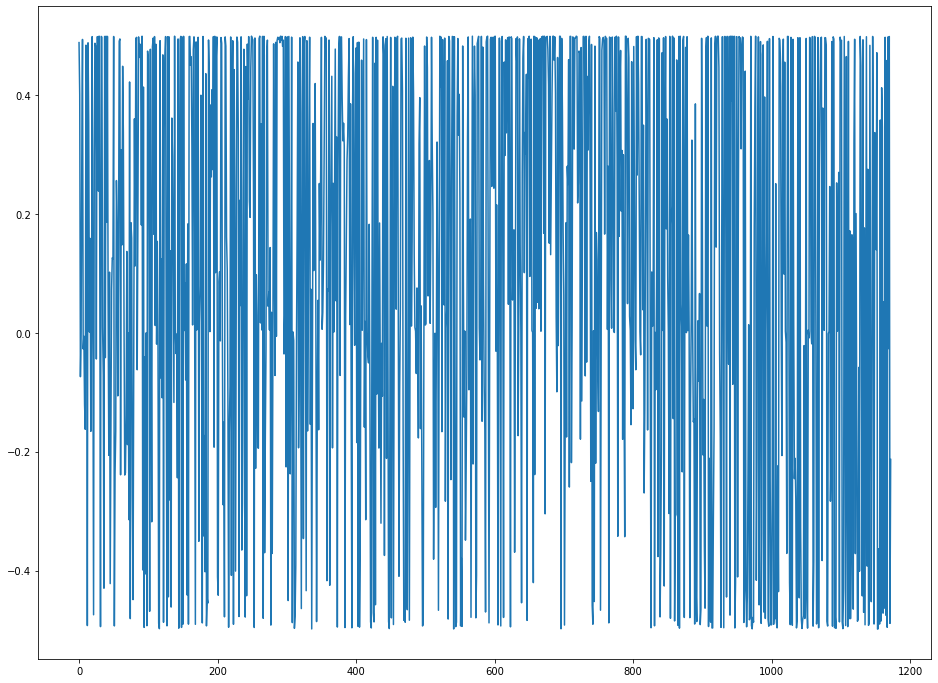

In [11]:
fig, ax = plt.subplots(figsize=[16, 12])
ax.plot(sentiments)

In [12]:
import cProfile
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

Q, P, Pcp = offcd.offline_changepoint_detection(sentiments, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

/home/yiyi/Documents/masterarbeit/CPD/cpd_experiments/bayesian-cpd/bayesian_changepoint_detection/offline_changepoint_detection.py:96: RuntimeWarning: invalid value encountered in log
  antiG = np.log(-G[n - 1 - t])


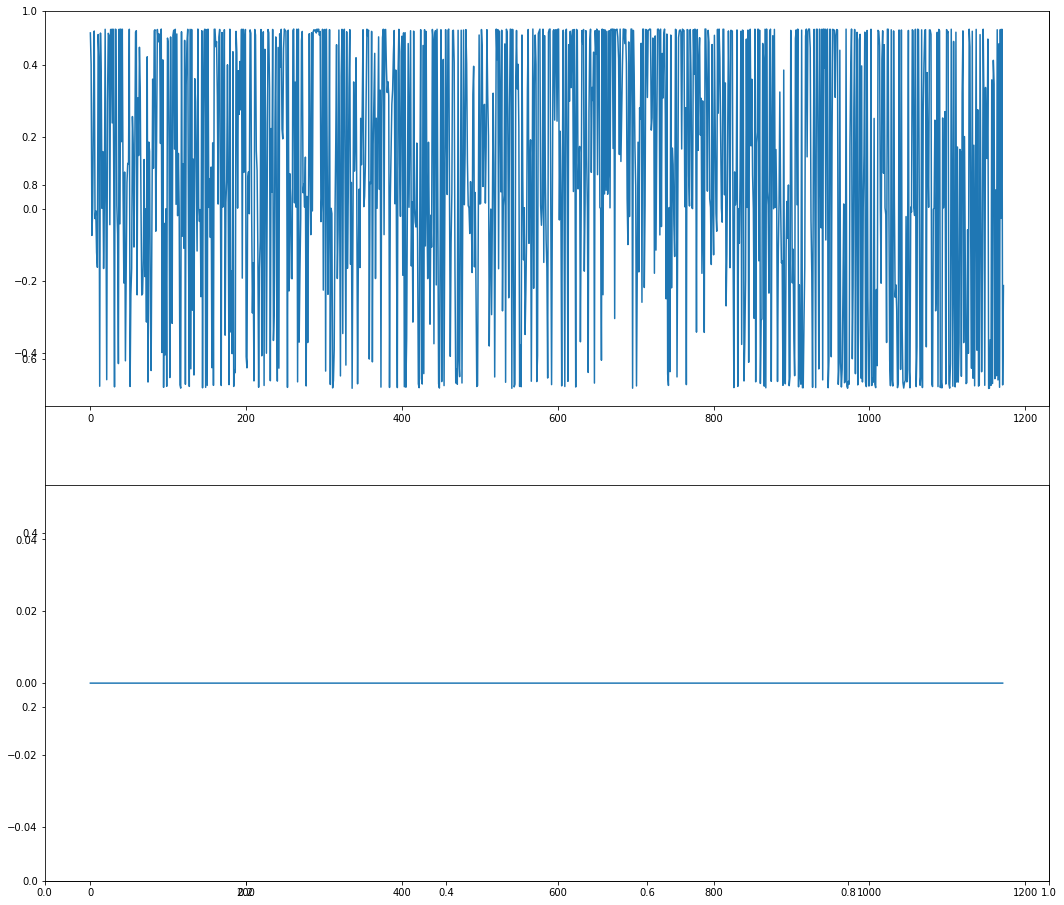

In [13]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(sentiments[:])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))

# Example 

https://github.com/hildensia/bayesian_changepoint_detection/blob/master/Example%20Code.ipynb

In [3]:
def generate_normal_time_series(num, minl=50, maxl=1000):
    data = np.array([], dtype=np.float64)
    partition = np.random.randint(minl, maxl, num)
    for p in partition:
        mean = np.random.randn()*10
        var = np.random.randn()*1
        if var < 0:
            var = var * -1
        tdata = np.random.normal(mean, var, p)
        data = np.concatenate((data, tdata))
    return data

In [4]:
data = generate_normal_time_series(7, 50, 200)


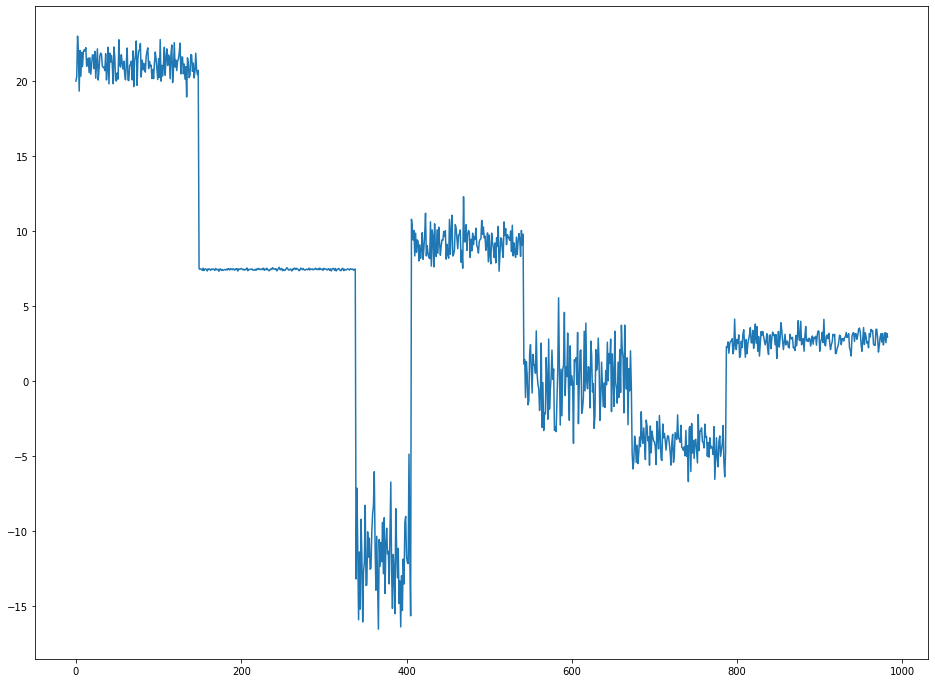

In [5]:
fig, ax = plt.subplots(figsize=[16, 12])
ax.plot(data)

## Offline Changepoint Detection

In [6]:
import cProfile
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

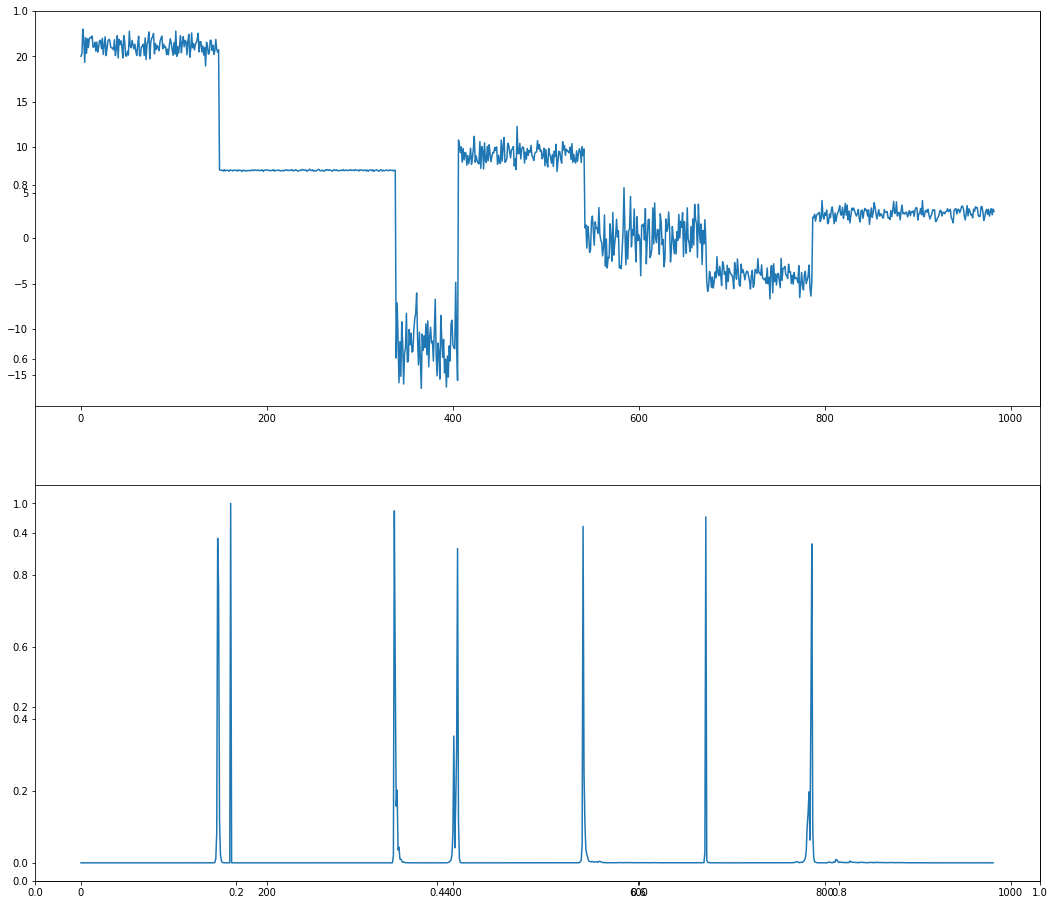

In [7]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(data[:])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))